In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image(image_path):
    image = Image.open(image_path)

    image_array = np.array(image) / 255.0
    
    if image_array.ndim == 2:
        image_array = np.expand_dims(image_array, axis=-1)
    
    return image_array

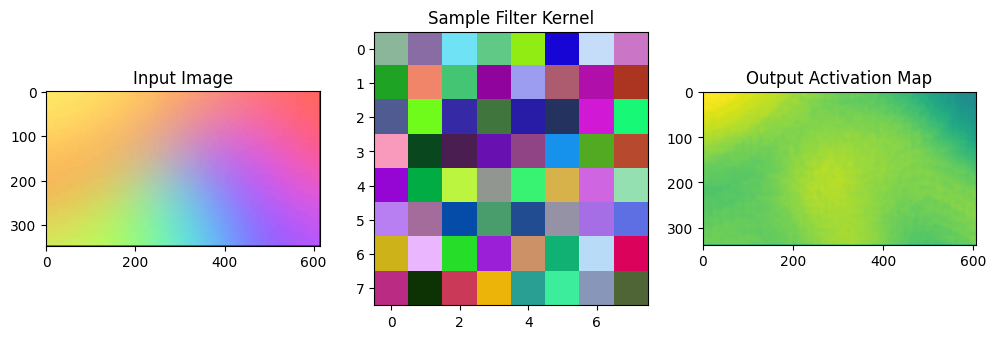

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def prelu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def apply_padding(image, pad):
    
    (image_height, image_width, num_channels) = image.shape
        
    padded_height = image_height + 2 * pad
    padded_width = image_width + 2 * pad
        
    padded_image = np.zeros((padded_height, padded_width, num_channels))
        
    padded_image[pad:pad+image_height, pad:pad+image_width, :] = image
    
    return padded_image

def convolution(image, kernel, stride=1, padding=0, activation="relu"):
    activation_func = {
        "sigmoid": sigmoid,
        "tanh": tanh,
        "relu": relu,
        "prelu": prelu
    }[activation]
    
    image = apply_padding(image, padding)
    
    (_, _, num_channels) = image.shape
    (_, _, kernel_channels) = kernel.shape
    
    if(kernel_channels != num_channels):
        return

    out_height = (image.shape[0] - kernel.shape[0]) // stride + 1
    out_width = (image.shape[1] - kernel.shape[1]) // stride + 1
    activation_maps = np.zeros((out_height, out_width))
    
    for y in range(out_height):
        for x in range(out_width):
            region = image[y*stride:y*stride+kernel.shape[0], x*stride:x*stride+kernel.shape[1], :]
            activation_maps[y, x] = np.sum(region * kernel)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(kernel, cmap='gray')
    plt.title("Sample Filter Kernel")
    
    plt.subplot(1, 3, 3)
    plt.imshow(activation_maps, cmap='viridis')
    plt.title("Output Activation Map")
    plt.show()
    
    return activation_maps


np.random.seed(0)  

image = load_image('pic.jpg')

kernel = np.random.rand(8, 8, image.shape[-1])

activation_map = convolution(image, kernel, stride=1, padding=1, activation="relu")



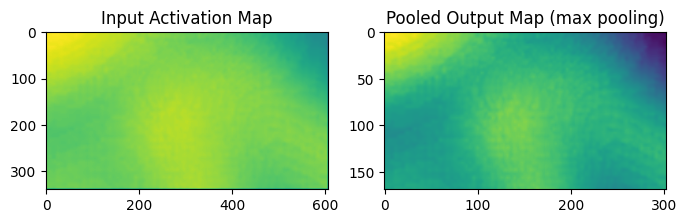

In [4]:
def pooling(activation_map, pool_type="max", pool_size=2, stride=2):
    (map_height, map_width) = activation_map.shape
    
    out_height = (map_height - pool_size) // stride + 1
    out_width = (map_width - pool_size) // stride + 1
    
    pooled_map = np.zeros((out_height, out_width))
    
    for y in range(0, out_height):
        for x in range(0, out_width):
            region = activation_map[y*stride:y*stride+pool_size, x*stride:x*stride+pool_size]
            
            if pool_type == "max":
                pooled_map[y, x] = np.max(region)
            elif pool_type == "min":
                pooled_map[y, x] = np.min(region)
            elif pool_type == "average":
                pooled_map[y, x] = np.mean(region)
            
            
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(activation_map, cmap='viridis')
    plt.title("Input Activation Map")
    
    plt.subplot(1, 2, 2)
    plt.imshow(pooled_map, cmap='viridis')
    plt.title(f"Pooled Output Map ({pool_type} pooling)")
    
    plt.show()
    
    return pooled_map

pooled_output = pooling(activation_map, pool_type="max", pool_size=2, stride=2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


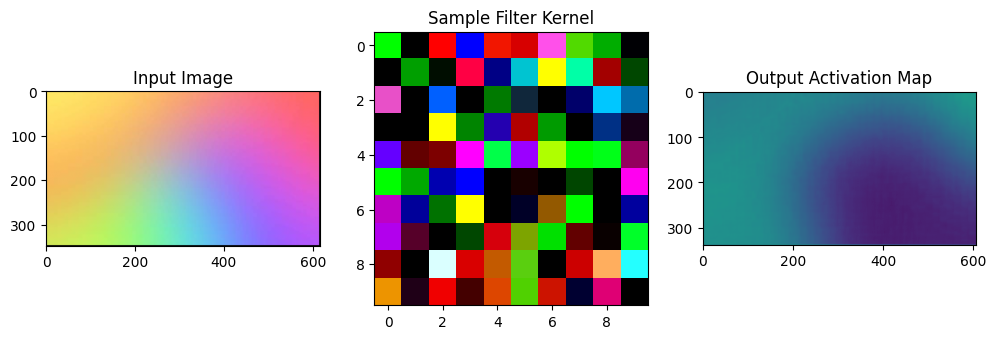

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


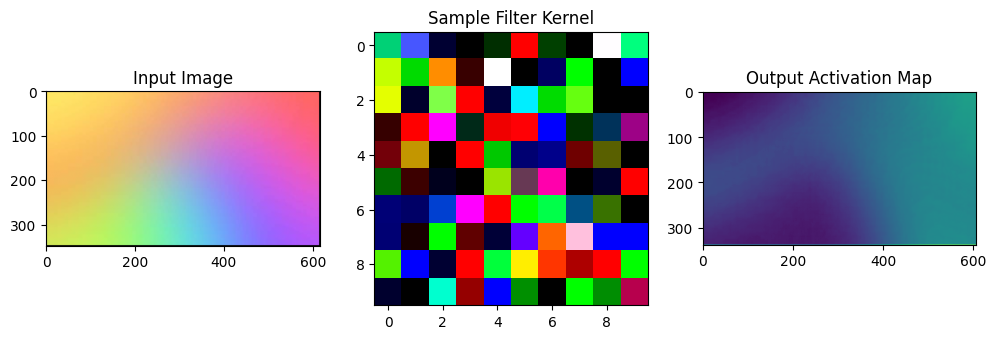

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


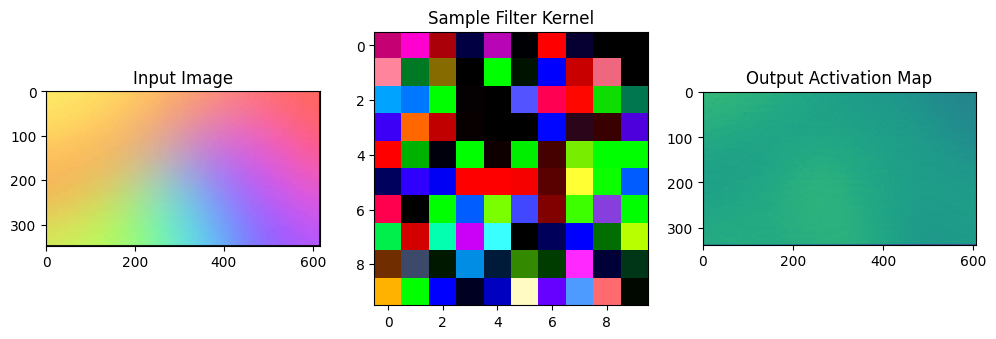

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


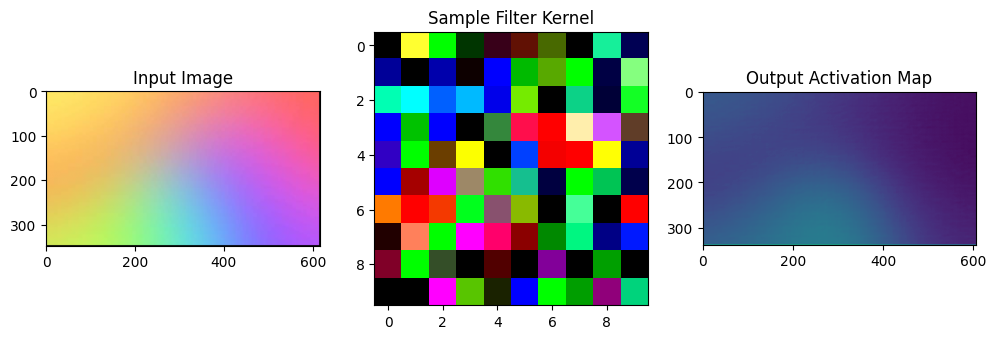

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


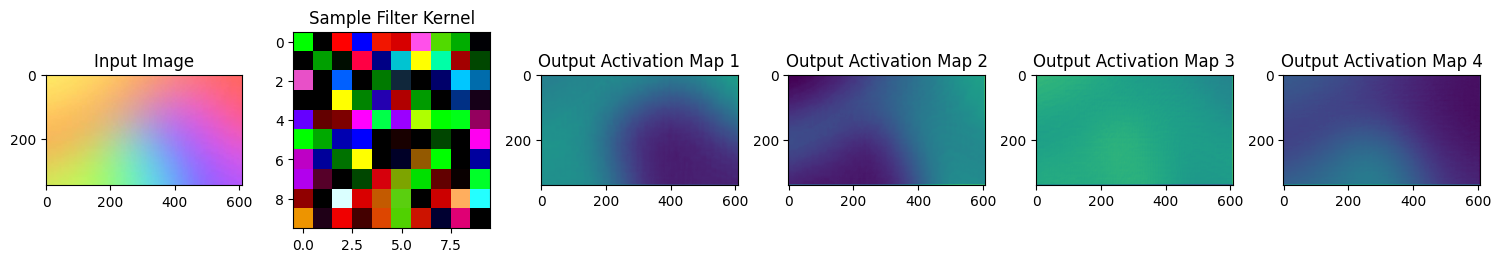

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def convolution_layer(image, kernels, stride=1, padding=2, activation="relu"):

    out_height = (image.shape[0] + 2 * padding - kernels.shape[1]) // stride + 1
    out_width = (image.shape[1] + 2 * padding - kernels.shape[2]) // stride + 1

    num_kernels = kernels.shape[0]
    output_volume = np.zeros((out_height, out_width, num_kernels))

    for k in range(num_kernels):
        output_volume[:, :, k] = convolution(image, kernels[k], stride, padding, activation)
    
    image = image
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, num_kernels + 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    
    plt.subplot(1, num_kernels + 2, 2)
    plt.imshow(kernels[0], cmap='viridis')
    plt.title("Sample Filter Kernel")
    
    for k in range(num_kernels):
        plt.subplot(1, num_kernels + 2, k + 3)
        plt.imshow(output_volume[:, :, k], cmap='viridis')
        plt.title(f"Output Activation Map {k+1}")

    plt.tight_layout()
    plt.show()

    return output_volume

kernels = np.random.randn(4, 10, 10, image.shape[-1])
activation_maps = convolution_layer(image, kernels)

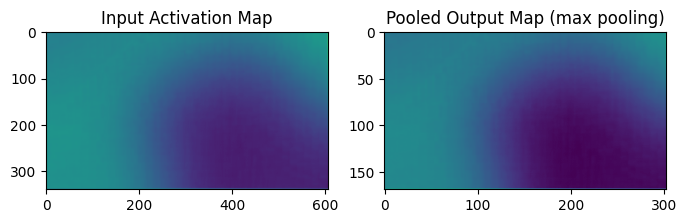

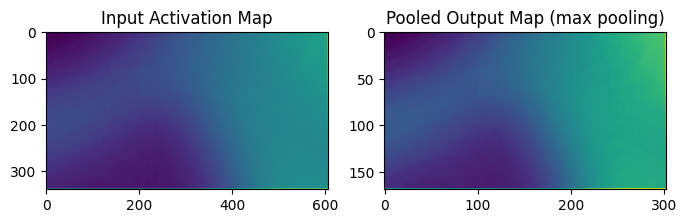

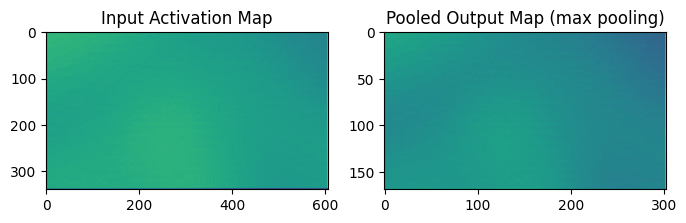

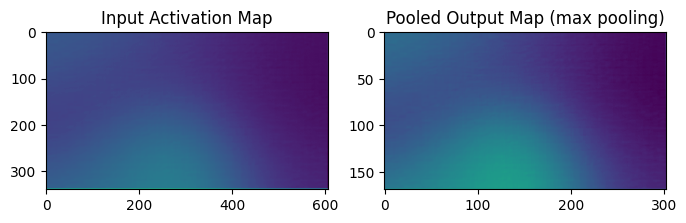

(339, 607)
(169, 303, 4)


In [6]:
def pooling_layer(activation_map_volume, pool_type="max", pool_size=2, stride=2):
    pooled_output = np.zeros((
        (activation_map_volume.shape[0] - pool_size) // stride + 1,
        (activation_map_volume.shape[1] - pool_size) // stride + 1,
        activation_map_volume.shape[2]
    ))

    for c in range(activation_map_volume.shape[2]):
        pooled_output[:, :, c] = pooling(activation_map_volume[:, :, c], pool_type, pool_size, stride)
    return pooled_output

pooled_output = pooling_layer(activation_maps, pool_size=2, stride=2)

print(activation_map.shape)
print(pooled_output.shape)

In [7]:
def flattening(volume, output_size):
    (height, width, channels) = volume.shape
    flattened_input = []

    for c in range(channels):
        for y in range(height):
            for x in range(width):
                flattened_input.append(volume[y, x, c])
    
    flattened_input = np.array(flattened_input)
    
    weight_matrix = np.random.rand(output_size, flattened_input.size)
    
    output_vector = np.dot(weight_matrix, flattened_input)
    
    print(f"Input volume shape: {volume.shape}")
    print(f"Flattened input shape: {flattened_input.shape}")
    print(f"Weight matrix shape: {weight_matrix.shape}")
    print(f"Output vector shape: {output_vector.shape}")
    
    return output_vector

np.random.seed(0)  
activation_map_volume = np.random.rand(4, 4, 3)  

output_size = 100

output_vector = flattening(pooled_output, output_size)

Input volume shape: (169, 303, 4)
Flattened input shape: (204828,)
Weight matrix shape: (100, 204828)
Output vector shape: (100,)


In [8]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def mlp(input_vector, hidden_layers, hidden_sizes, activation="relu", output_size=1):
    activation_func = {
        "sigmoid": sigmoid,
        "tanh": tanh,
        "relu": relu,
        "prelu": prelu
    }[activation]
    
    weights = []
    biases = []
    
    prev_layer_size = input_vector.size
    for size in hidden_sizes:
        weights.append(np.random.rand(size, prev_layer_size))
        biases.append(np.random.rand(size))
        prev_layer_size = size
    
    weights.append(np.random.rand(output_size, prev_layer_size))
    biases.append(np.random.rand(output_size))
    
    x = input_vector
    for i in range(len(hidden_sizes)):
        x = np.dot(weights[i], x) + biases[i]
        x = activation_func(x)
    
    output = np.dot(weights[-1], x) + biases[-1]
    
    output_softmax = softmax(output)
    
    print(f"Input vector shape: {input_vector.shape}")
    for i, (w, b) in enumerate(zip(weights, biases)):
        print(f"Layer {i+1} - Weights shape: {w.shape}, Biases shape: {b.shape}")
    print(f"Output shape: {output.shape}")
    print(f"Softmax Output shape: {output_softmax.shape}")
    
    return output, output_softmax


np.random.seed(0)  
input_vector = np.random.rand(16)  

hidden_layers = 2
hidden_sizes = [8, 4]  
output_size = 3  


output, output_softmax = mlp(input_vector, hidden_layers, hidden_sizes, activation="relu", output_size=output_size)

print("Output without softmax:", output)
print("Output with softmax:", output_softmax)


Input vector shape: (16,)
Layer 1 - Weights shape: (8, 16), Biases shape: (8,)
Layer 2 - Weights shape: (4, 8), Biases shape: (4,)
Layer 3 - Weights shape: (3, 4), Biases shape: (3,)
Output shape: (3,)
Softmax Output shape: (3,)
Output without softmax: [32.91175597 49.21046473 20.76056611]
Output with softmax: [8.34758192e-08 9.99999917e-01 4.40926278e-13]


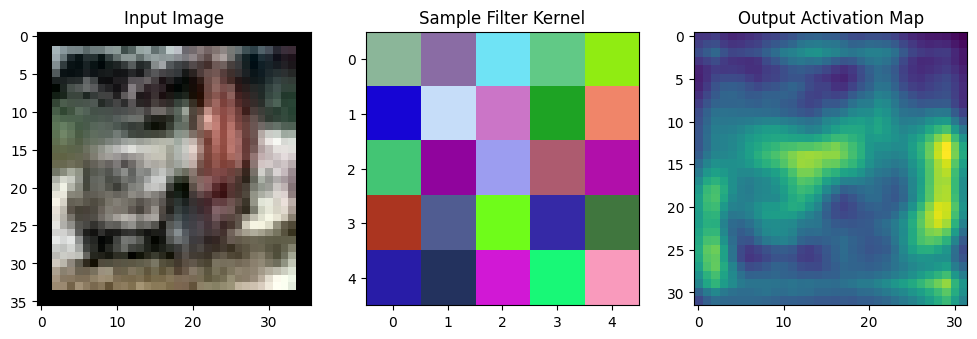

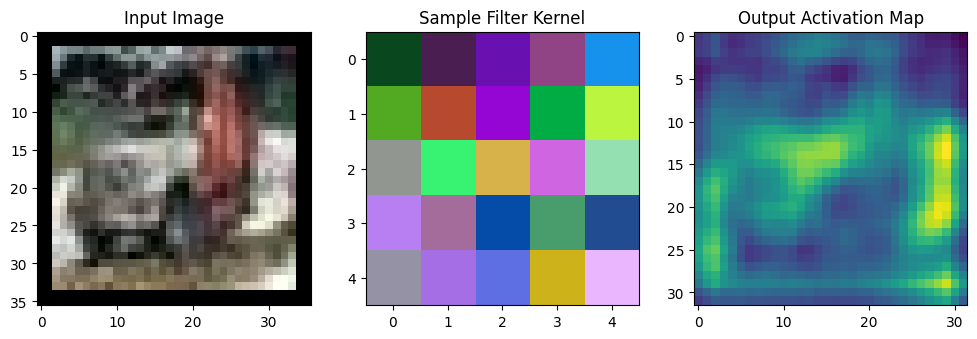

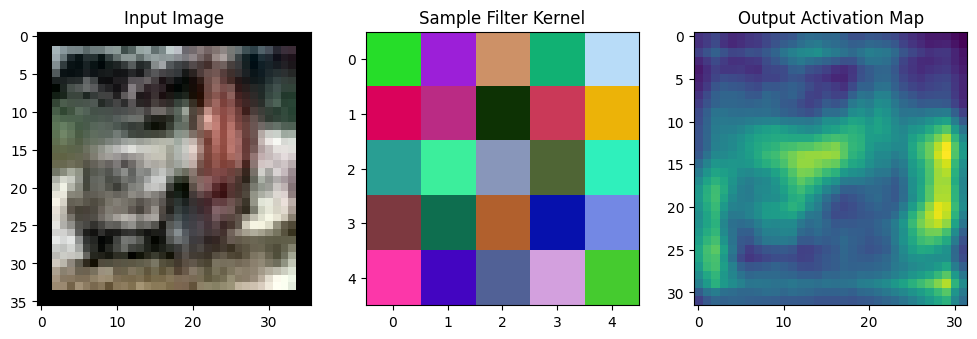

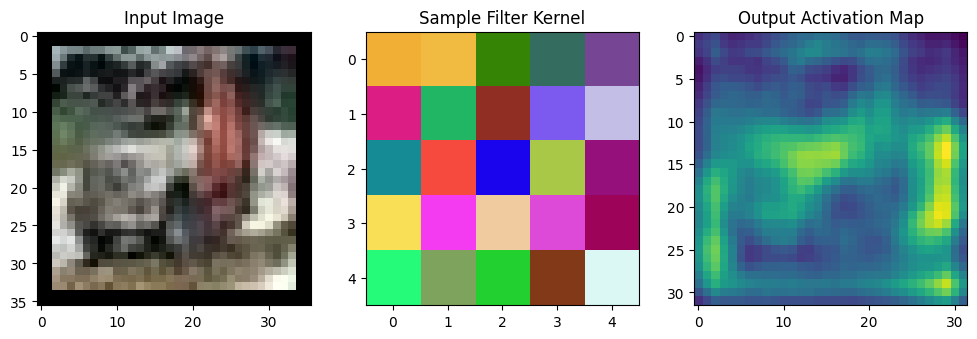

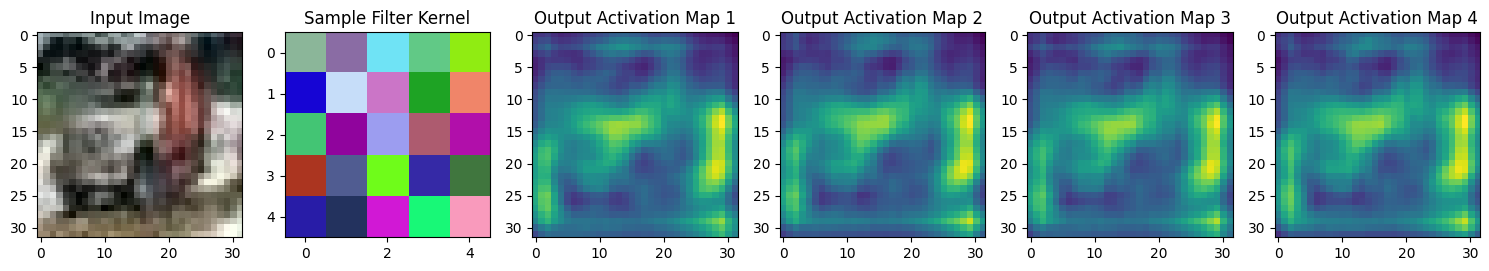

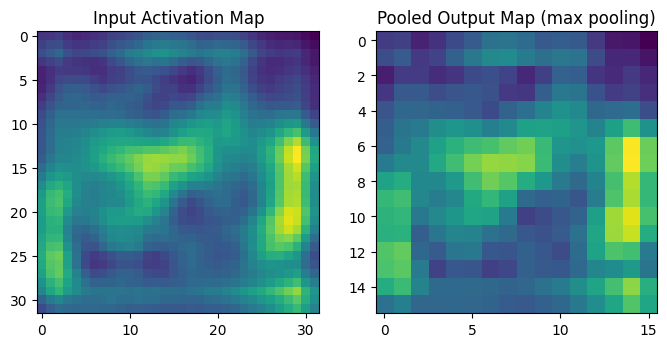

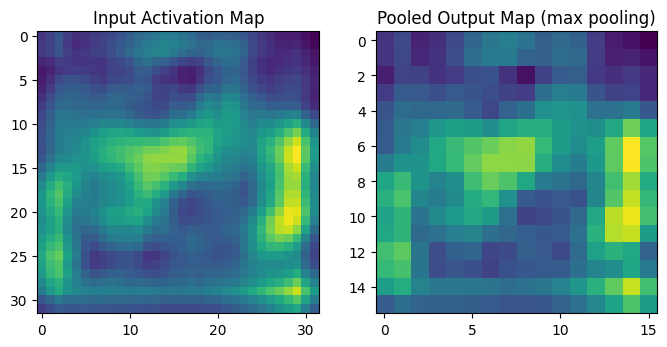

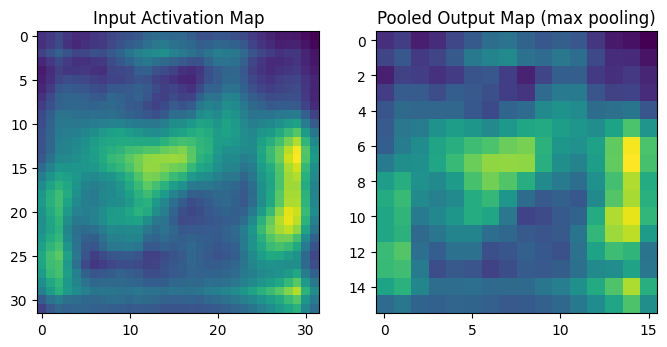

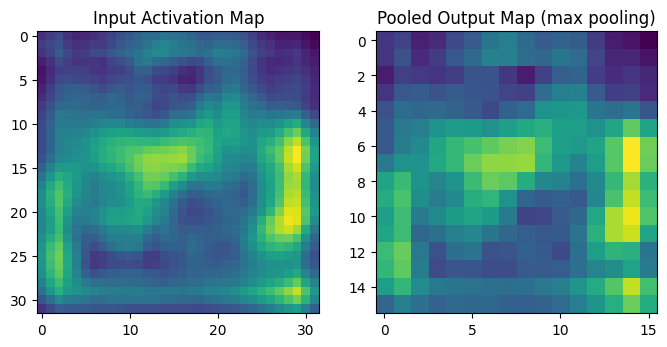

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


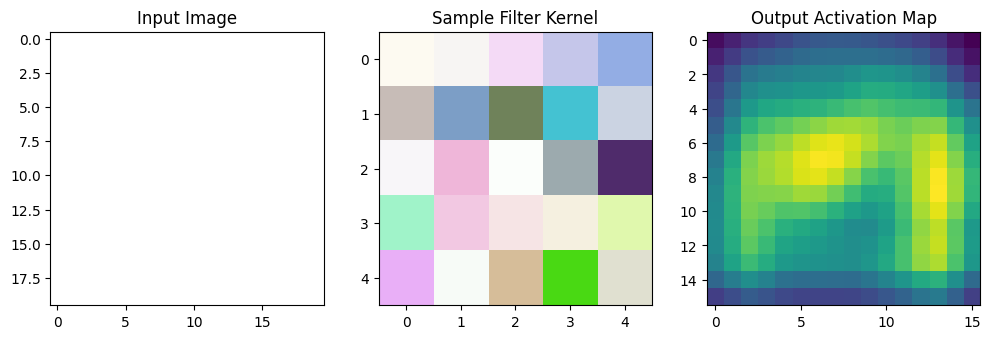

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


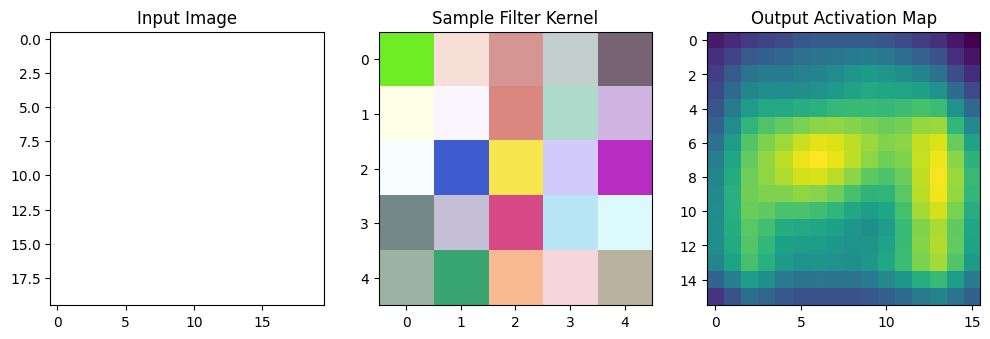

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


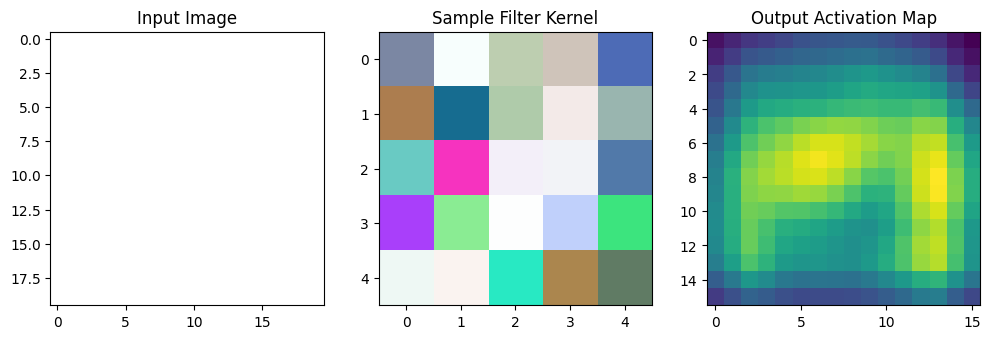

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


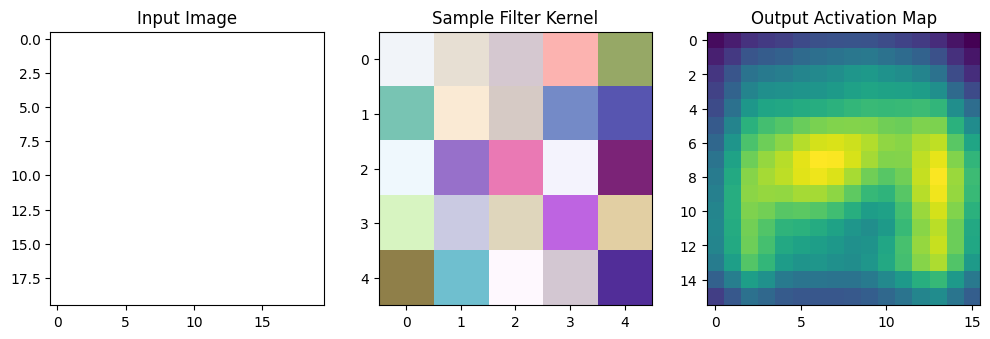

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


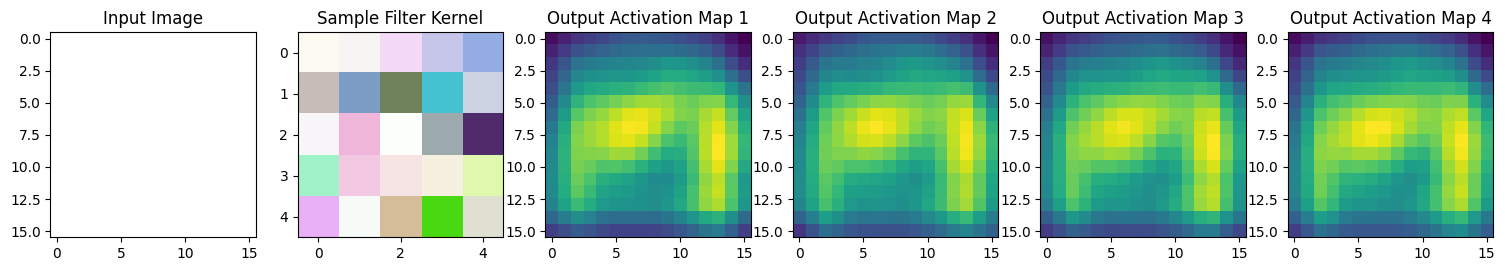

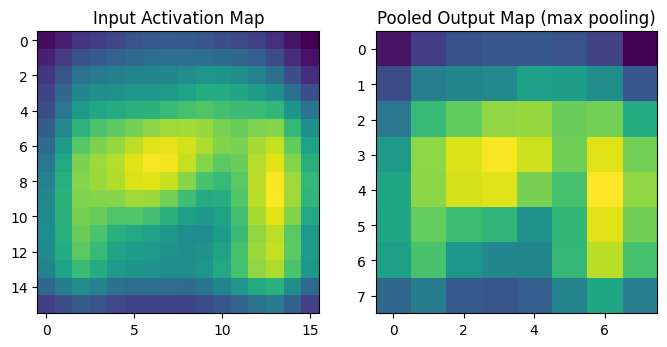

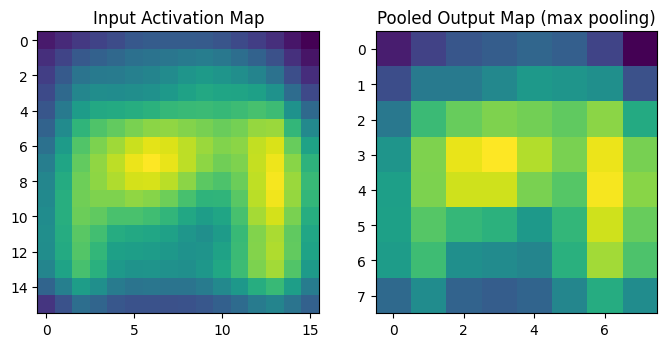

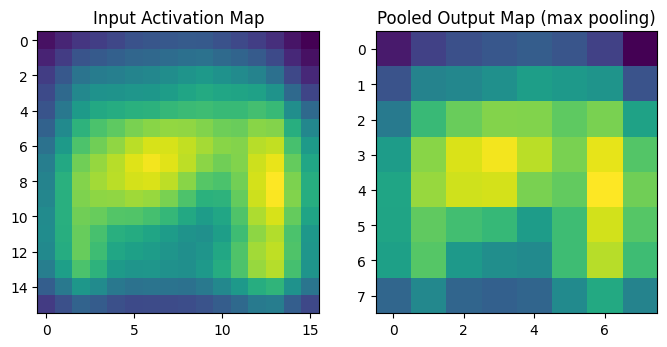

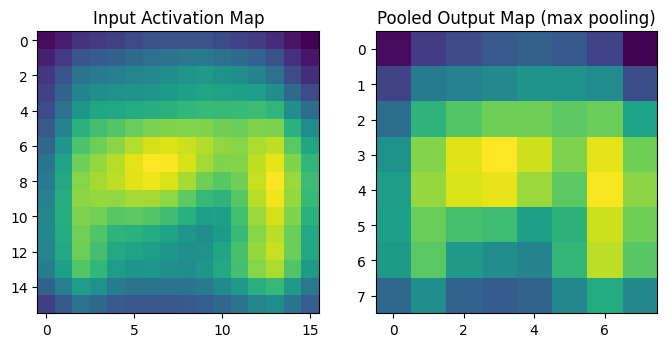

Input vector shape: (256,)
Layer 1 - Weights shape: (49, 256), Biases shape: (49,)
Layer 2 - Weights shape: (10, 49), Biases shape: (10,)
Output shape: (10,)
Softmax Output shape: (10,)
Output vector (without softmax): [32.91175597 49.21046473 20.76056611]
Output vector (with softmax): [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
def cnn_feed_forward(image):
    kernels1 = np.random.rand(4, 5, 5, 3)
    
    conv1_output = convolution_layer(image, kernels1, stride=1, padding=2, activation="relu")
    
    pool1_output = pooling_layer(conv1_output, pool_type="max", pool_size=2, stride=2)
    
    kernels2 = np.random.rand(4, 5, 5, 4)
    conv2_output = convolution_layer(pool1_output, kernels2, stride=1, padding=2, activation="relu")
    
    pool2_output = pooling_layer(conv2_output, pool_type="max", pool_size=2, stride=2)
    
    flatten_output = pool2_output.flatten()
    
    output, output_softmax = mlp(flatten_output, hidden_layers=1, hidden_sizes=[49], activation="relu", output_size=10)
    
    return output, output_softmax

np.random.seed(0)  
input_image = load_image('0018.jpg')

_, output_softmax = cnn_feed_forward(input_image)

print("Output vector (without softmax):", output)
print("Output vector (with softmax):", output_softmax)


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
import random

In [11]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(4, 4, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(4 * 8 * 8, 49)
        self.fc2 = nn.Linear(49, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 4 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
class_indices = {label: [] for label in range(10)}
for idx, (_, label) in enumerate(train_dataset):
    if len(class_indices[label]) < 100:
        class_indices[label].append(idx)
selected_indices = [i for indices in class_indices.values() for i in indices]

test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
class_test_indices = {label: [] for label in range(10)}
for idx, (_, label) in enumerate(test_dataset):
    if len(class_test_indices[label]) < 10:
        class_test_indices[label].append(idx)
test_subset_indices = [i for indices in class_test_indices.values() for i in indices]
test_loader = DataLoader(Subset(test_dataset, test_subset_indices), batch_size=10, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def trainModel(model, optimizer, criterion, num_epochs=15):
    train_errors, test_errors = [], []

    for epoch in range(num_epochs):
        random.shuffle(selected_indices)
        train_loader = DataLoader(Subset(train_dataset, selected_indices), batch_size=10, shuffle=True)

        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_errors.append(running_loss / len(train_loader))

        model.eval()
        test_loss, correct = 0.0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()

        test_errors.append(test_loss / len(test_loader))
        accuracy = correct / len(test_subset_indices)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_errors[-1]:.4f}, "
              f"Test Loss: {test_errors[-1]:.4f}, Accuracy: {accuracy * 100:.2f}%")

    print(f"Final Accuracy: {accuracy * 100:.2f}%")
    return train_errors, test_errors, accuracy

In [15]:
def plot_errors(train_errors, test_errors):
    plt.figure(figsize=(10, 5))
    plt.plot(train_errors, label='Training Error')
    plt.plot(test_errors, label='Test Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.title('Training and Test Errors')
    plt.show()

def visualize_activations(model, image):
    model.eval()
    activations = []

    x = torch.relu(model.conv1(image))
    activations.append(x[0, :4].detach().numpy())  
    x = model.pool(x)

    x = torch.relu(model.conv2(x))
    activations.append(x[0, :4].detach().numpy())  
    x = model.pool(x)

    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    for i in range(2):
        for j in range(4):
            axes[i, j].imshow(activations[i][j], cmap='viridis')
            axes[i, j].axis('off')
    plt.suptitle('Activation Maps from Convolutional Layers')
    plt.show()

In [16]:
criterion = nn.CrossEntropyLoss()

Training with Vanilla SGD
Epoch [1/15], Train Loss: 2.3046, Test Loss: 2.3044, Accuracy: 14.00%
Epoch [2/15], Train Loss: 2.3045, Test Loss: 2.3043, Accuracy: 14.00%
Epoch [3/15], Train Loss: 2.3043, Test Loss: 2.3042, Accuracy: 14.00%
Epoch [4/15], Train Loss: 2.3042, Test Loss: 2.3041, Accuracy: 14.00%
Epoch [5/15], Train Loss: 2.3041, Test Loss: 2.3039, Accuracy: 13.00%
Epoch [6/15], Train Loss: 2.3039, Test Loss: 2.3038, Accuracy: 13.00%
Epoch [7/15], Train Loss: 2.3038, Test Loss: 2.3037, Accuracy: 12.00%
Epoch [8/15], Train Loss: 2.3037, Test Loss: 2.3036, Accuracy: 11.00%
Epoch [9/15], Train Loss: 2.3035, Test Loss: 2.3034, Accuracy: 12.00%
Epoch [10/15], Train Loss: 2.3034, Test Loss: 2.3033, Accuracy: 12.00%
Epoch [11/15], Train Loss: 2.3033, Test Loss: 2.3032, Accuracy: 12.00%
Epoch [12/15], Train Loss: 2.3031, Test Loss: 2.3031, Accuracy: 13.00%
Epoch [13/15], Train Loss: 2.3030, Test Loss: 2.3029, Accuracy: 13.00%
Epoch [14/15], Train Loss: 2.3028, Test Loss: 2.3028, Accura

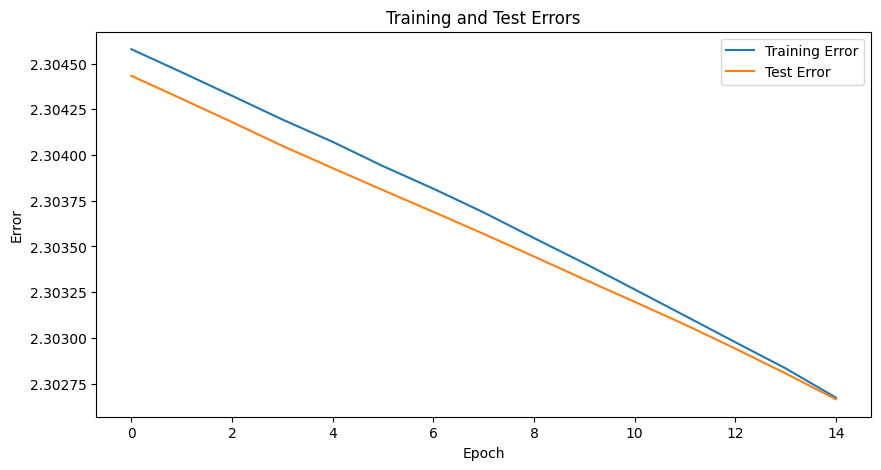

In [17]:
print("Training with Vanilla SGD")
model = SimpleCNN()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.001)
train_errors_sgd, test_errors_sgd, accuracy_sgd = trainModel(model, optimizer_sgd, criterion)
plot_errors(train_errors_sgd, test_errors_sgd)

Training with SGD + Momentum
Epoch [1/15], Train Loss: 2.3023, Test Loss: 2.2992, Accuracy: 10.00%
Epoch [2/15], Train Loss: 2.2946, Test Loss: 2.2909, Accuracy: 10.00%
Epoch [3/15], Train Loss: 2.2791, Test Loss: 2.2649, Accuracy: 19.00%
Epoch [4/15], Train Loss: 2.2352, Test Loss: 2.1888, Accuracy: 17.00%
Epoch [5/15], Train Loss: 2.1347, Test Loss: 2.0696, Accuracy: 22.00%
Epoch [6/15], Train Loss: 2.0441, Test Loss: 2.0353, Accuracy: 34.00%
Epoch [7/15], Train Loss: 1.9817, Test Loss: 2.0317, Accuracy: 29.00%
Epoch [8/15], Train Loss: 1.9421, Test Loss: 2.0022, Accuracy: 31.00%
Epoch [9/15], Train Loss: 1.9128, Test Loss: 1.9815, Accuracy: 33.00%
Epoch [10/15], Train Loss: 1.8597, Test Loss: 1.9921, Accuracy: 37.00%
Epoch [11/15], Train Loss: 1.8192, Test Loss: 1.9223, Accuracy: 37.00%
Epoch [12/15], Train Loss: 1.7773, Test Loss: 1.9447, Accuracy: 35.00%
Epoch [13/15], Train Loss: 1.7550, Test Loss: 1.9017, Accuracy: 33.00%
Epoch [14/15], Train Loss: 1.7045, Test Loss: 1.9301, Acc

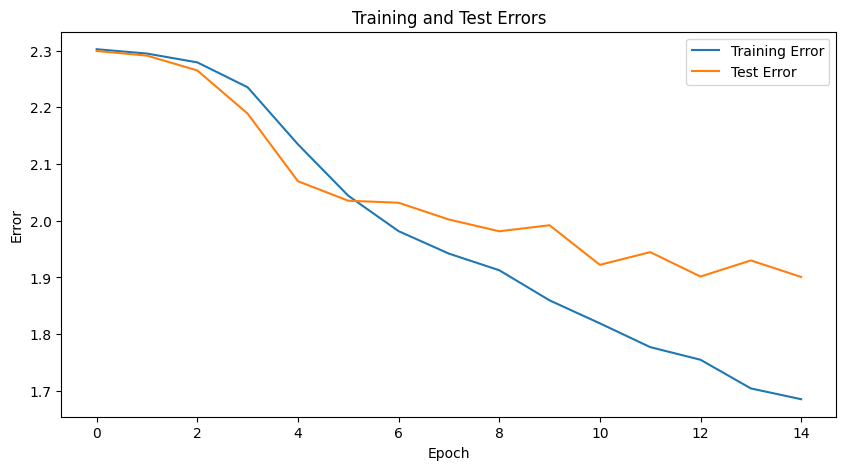

In [18]:
print("Training with SGD + Momentum")
model = SimpleCNN()  
optimizer_momentum = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train_errors_momentum, test_errors_momentum, accuracy_momentum = trainModel(model, optimizer_momentum, criterion)
plot_errors(train_errors_momentum, test_errors_momentum)

Training with RMSProp
Epoch [1/15], Train Loss: 2.1982, Test Loss: 2.0701, Accuracy: 25.00%
Epoch [2/15], Train Loss: 1.9995, Test Loss: 1.9776, Accuracy: 28.00%
Epoch [3/15], Train Loss: 1.8965, Test Loss: 1.9092, Accuracy: 36.00%
Epoch [4/15], Train Loss: 1.8026, Test Loss: 1.8173, Accuracy: 39.00%
Epoch [5/15], Train Loss: 1.7261, Test Loss: 1.7806, Accuracy: 38.00%
Epoch [6/15], Train Loss: 1.6641, Test Loss: 1.8914, Accuracy: 35.00%
Epoch [7/15], Train Loss: 1.6269, Test Loss: 1.7339, Accuracy: 38.00%
Epoch [8/15], Train Loss: 1.5769, Test Loss: 1.7094, Accuracy: 42.00%
Epoch [9/15], Train Loss: 1.5366, Test Loss: 1.6958, Accuracy: 38.00%
Epoch [10/15], Train Loss: 1.4887, Test Loss: 1.6913, Accuracy: 40.00%
Epoch [11/15], Train Loss: 1.4264, Test Loss: 1.7099, Accuracy: 42.00%
Epoch [12/15], Train Loss: 1.3991, Test Loss: 1.7375, Accuracy: 45.00%
Epoch [13/15], Train Loss: 1.3512, Test Loss: 1.7771, Accuracy: 40.00%
Epoch [14/15], Train Loss: 1.3121, Test Loss: 1.7271, Accuracy: 

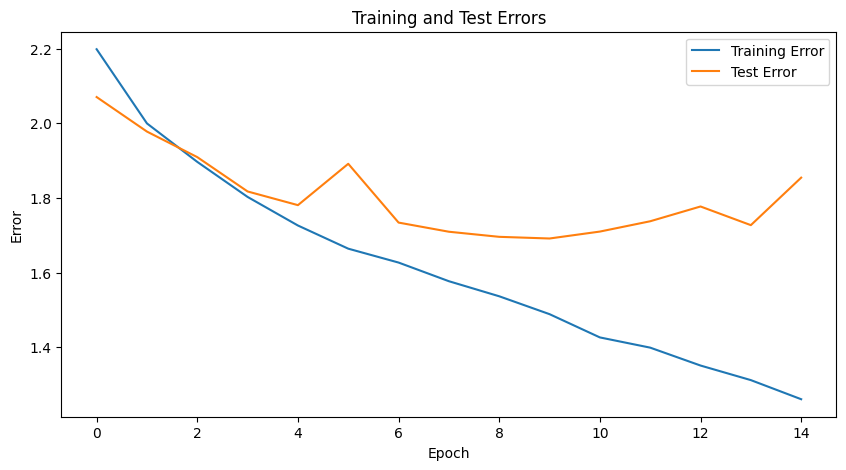

In [19]:
print("Training with RMSProp")
model = SimpleCNN()  
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
train_errors_rmsprop, test_errors_rmsprop, accuracy_rmsprop = trainModel(model, optimizer_rmsprop, criterion)
plot_errors(train_errors_rmsprop, test_errors_rmsprop) 


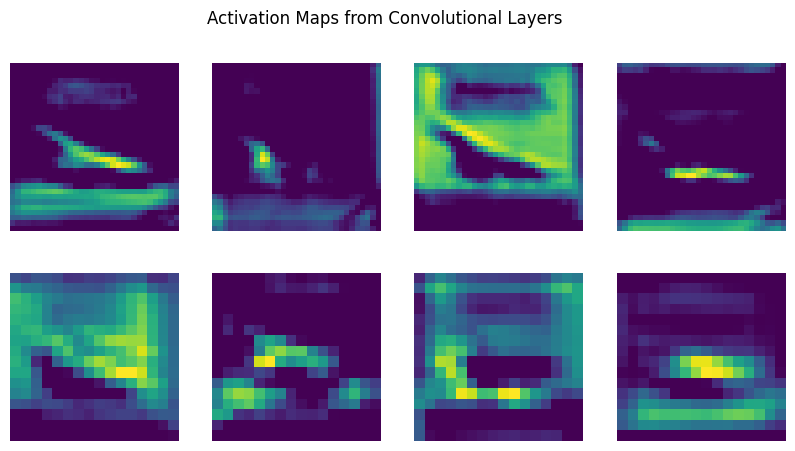

In [20]:
sample_image, _ = next(iter(test_loader))  
visualize_activations(model, sample_image[0].unsqueeze(0)) 

In [ ]:
def get_bottleneck_features(model, dataloader):
    bottleneck_features = []
    model.eval()
    with torch.no_grad():
        for images, _ in dataloader:
            x = torch.relu(model.conv1(images))
            x = model.pool(x)
            x = torch.relu(model.conv2(x))
            x = model.pool(x)
            x = x.view(x.size(0), -1)
            bottleneck_features.append(x)
    return torch.cat(bottleneck_features).numpy()


In [ ]:
def trainModel_tsne(model, optimizer, criterion, num_epochs=15):
    train_errors, test_errors = [], []
    bottleneck_features_first_epoch = None
    bottleneck_features_last_epoch = None

    for epoch in range(num_epochs):
        random.shuffle(selected_indices)
        train_loader = DataLoader(Subset(train_dataset, selected_indices), batch_size=10, shuffle=True)

        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_errors.append(running_loss / len(train_loader))

        model.eval()
        test_loss, correct = 0.0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()

        test_errors.append(test_loss / len(test_loader))
        accuracy = correct / len(test_subset_indices)

        if epoch == 0:
            bottleneck_features_first_epoch = get_bottleneck_features(model, test_loader)
        elif epoch == num_epochs - 1:
            bottleneck_features_last_epoch = get_bottleneck_features(model, test_loader)

    return train_errors, test_errors, accuracy, bottleneck_features_first_epoch, bottleneck_features_last_epoch


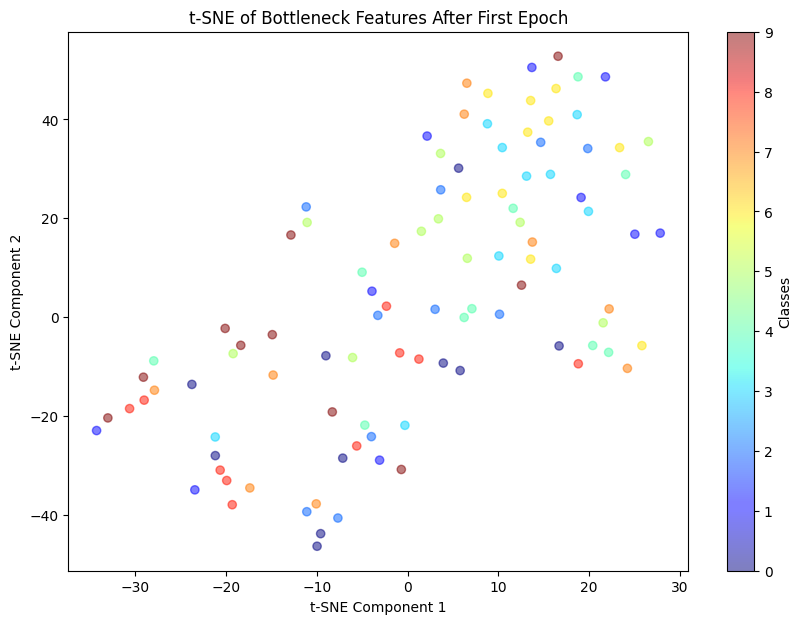

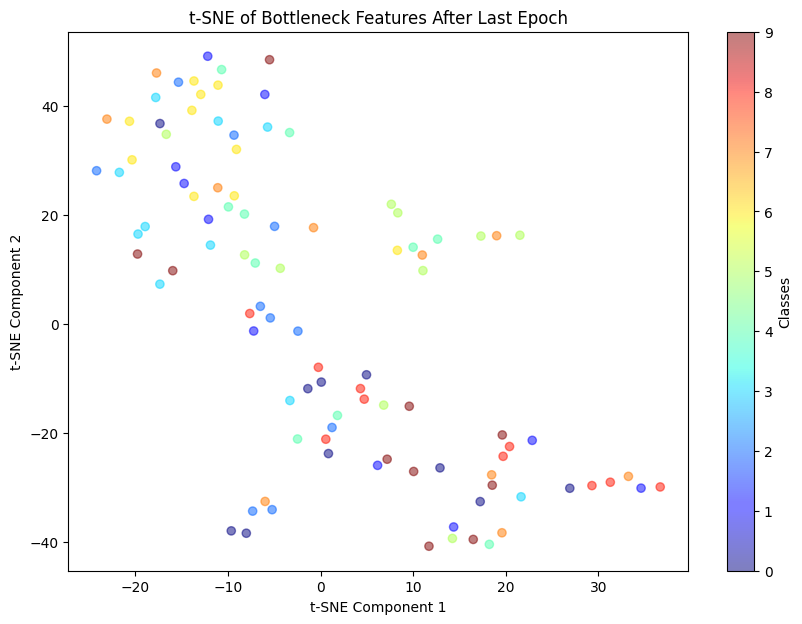

In [23]:
from sklearn.manifold import TSNE

def plot_tsne(features, labels, title, perplexity=5):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    features_2d = tsne.fit_transform(features)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap='jet', alpha=0.5)
    plt.title(title)
    plt.colorbar(scatter, label='Classes')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.001)
train_errors_sgd, test_errors_sgd, accuracy_sgd, bottleneck_features_first_epoch, bottleneck_features_last_epoch = trainModel_tsne(model, optimizer_sgd, criterion)

test_labels = [label for _, label in Subset(test_dataset, test_subset_indices)]
test_labels = torch.tensor(test_labels).numpy()

plot_tsne(bottleneck_features_first_epoch, test_labels, 't-SNE of Bottleneck Features After First Epoch')
plot_tsne(bottleneck_features_last_epoch, test_labels, 't-SNE of Bottleneck Features After Last Epoch')


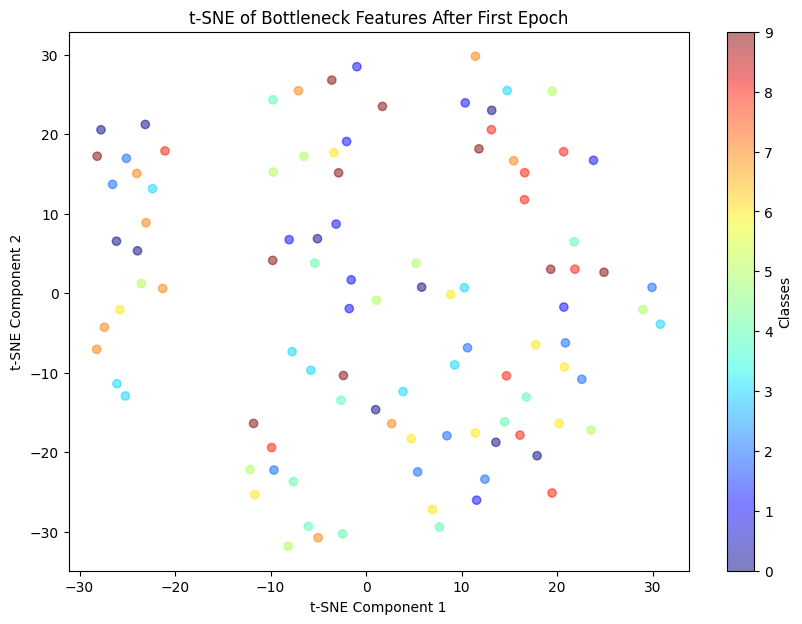

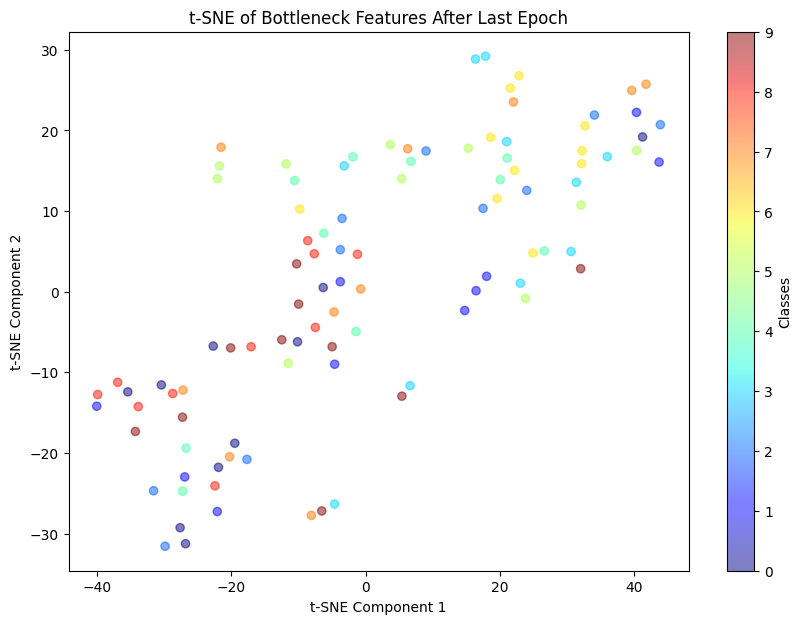

In [24]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()

optimizer_momentum = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train_errors_momentum, test_errors_momentum, accuracy_momentum, bottleneck_features_first_epoch, bottleneck_features_last_epoch = trainModel_tsne(model, optimizer_momentum, criterion)

test_labels = [label for _, label in Subset(test_dataset, test_subset_indices)]
test_labels = torch.tensor(test_labels).numpy()

plot_tsne(bottleneck_features_first_epoch, test_labels, 't-SNE of Bottleneck Features After First Epoch')
plot_tsne(bottleneck_features_last_epoch, test_labels, 't-SNE of Bottleneck Features After Last Epoch')

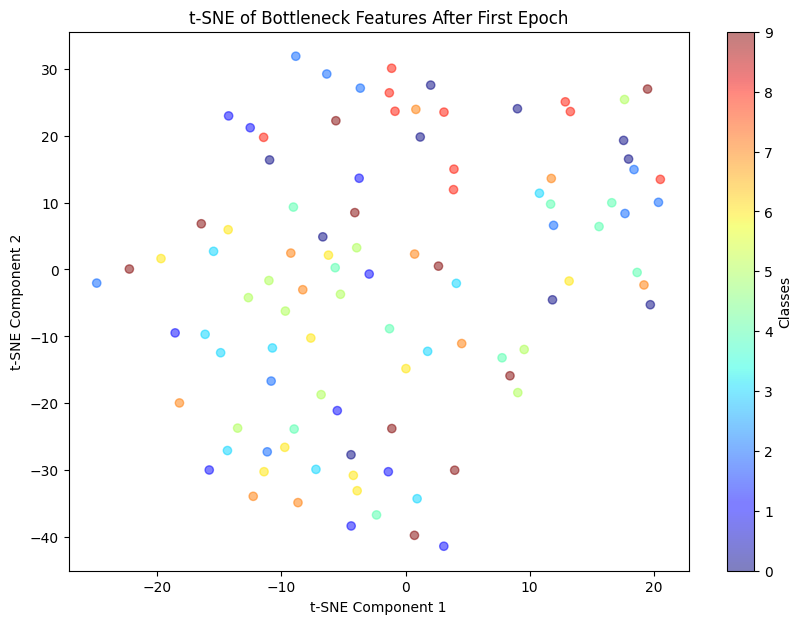

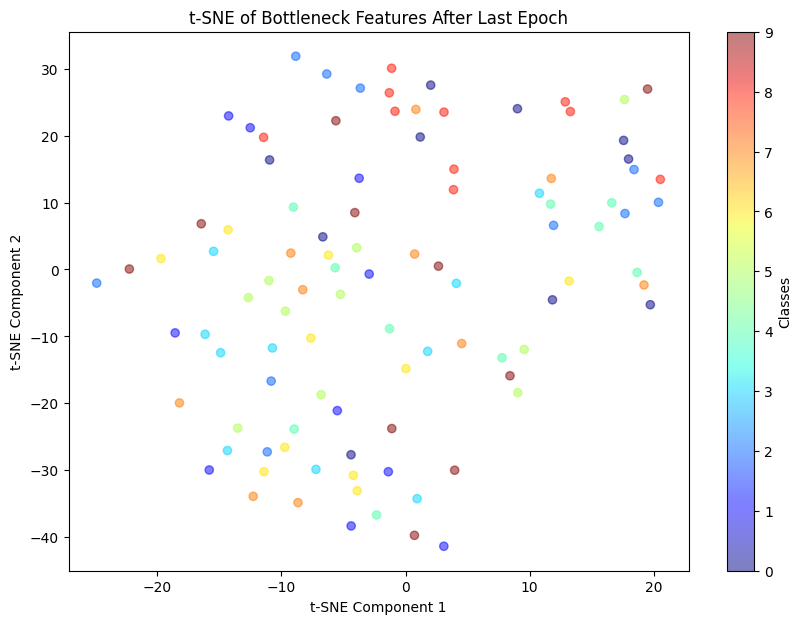

In [25]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()

optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
train_errors_momentum, test_errors_momentum, accuracy_momentum, bottleneck_features_first_epoch, bottleneck_features_last_epoch = trainModel_tsne(model, optimizer_momentum, criterion)

test_labels = [label for _, label in Subset(test_dataset, test_subset_indices)]
test_labels = torch.tensor(test_labels).numpy()

plot_tsne(bottleneck_features_first_epoch, test_labels, 't-SNE of Bottleneck Features After First Epoch')
plot_tsne(bottleneck_features_last_epoch, test_labels, 't-SNE of Bottleneck Features After Last Epoch')

In [ ]:
class CNNModel(nn.Module):
    def __init__(self, dropout_rate=0.0):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(4, 4, kernel_size=5, stride=1, padding=2)
        
        self.dropout = nn.Dropout(dropout_rate) 
        self.fc1 = nn.Linear(4 * 8 * 8, 49)
        self.fc2 = nn.Linear(49, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 4 * 8 * 8)
        
        x = self.dropout(torch.relu(self.fc1(x)))  
        x = self.fc2(x)
        return x


Training without Dropout (Baseline)
Epoch [1/15], Train Loss: 2.1941, Test Loss: 2.0221, Accuracy: 32.00%
Epoch [2/15], Train Loss: 2.0080, Test Loss: 1.9573, Accuracy: 37.00%
Epoch [3/15], Train Loss: 1.9224, Test Loss: 1.9248, Accuracy: 34.00%
Epoch [4/15], Train Loss: 1.8633, Test Loss: 1.9232, Accuracy: 33.00%
Epoch [5/15], Train Loss: 1.8154, Test Loss: 1.8557, Accuracy: 36.00%
Epoch [6/15], Train Loss: 1.7538, Test Loss: 1.8465, Accuracy: 38.00%
Epoch [7/15], Train Loss: 1.6947, Test Loss: 1.8050, Accuracy: 30.00%
Epoch [8/15], Train Loss: 1.6570, Test Loss: 1.8143, Accuracy: 34.00%
Epoch [9/15], Train Loss: 1.6030, Test Loss: 1.7886, Accuracy: 38.00%
Epoch [10/15], Train Loss: 1.5555, Test Loss: 1.8056, Accuracy: 34.00%
Epoch [11/15], Train Loss: 1.5014, Test Loss: 1.9506, Accuracy: 33.00%
Epoch [12/15], Train Loss: 1.4631, Test Loss: 1.7294, Accuracy: 40.00%
Epoch [13/15], Train Loss: 1.4256, Test Loss: 1.7195, Accuracy: 37.00%
Epoch [14/15], Train Loss: 1.3687, Test Loss: 1.72

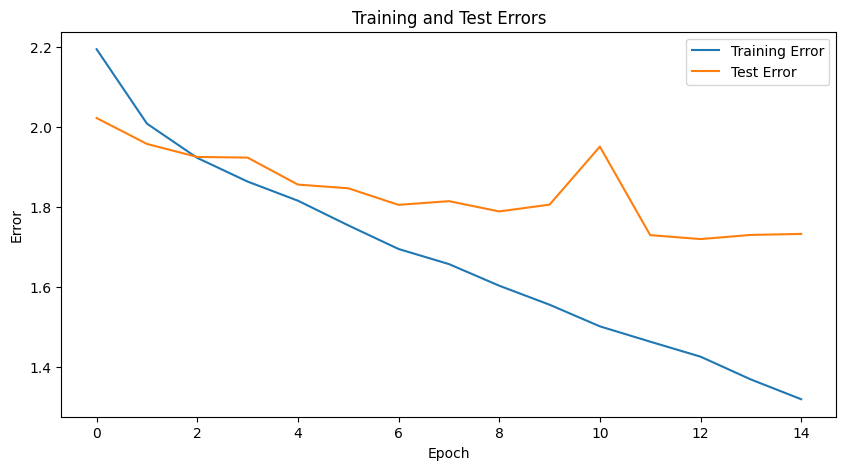


Training with RMSProp and Dropout Rate: 0.2
Epoch [1/15], Train Loss: 2.2103, Test Loss: 2.0993, Accuracy: 23.00%
Epoch [2/15], Train Loss: 2.0705, Test Loss: 2.0062, Accuracy: 29.00%
Epoch [3/15], Train Loss: 1.9984, Test Loss: 1.9775, Accuracy: 31.00%
Epoch [4/15], Train Loss: 1.9196, Test Loss: 1.9088, Accuracy: 35.00%
Epoch [5/15], Train Loss: 1.8911, Test Loss: 1.8699, Accuracy: 33.00%
Epoch [6/15], Train Loss: 1.8016, Test Loss: 1.8976, Accuracy: 32.00%
Epoch [7/15], Train Loss: 1.7461, Test Loss: 1.8683, Accuracy: 32.00%
Epoch [8/15], Train Loss: 1.6765, Test Loss: 1.8459, Accuracy: 32.00%
Epoch [9/15], Train Loss: 1.6338, Test Loss: 1.8471, Accuracy: 34.00%
Epoch [10/15], Train Loss: 1.5868, Test Loss: 1.8099, Accuracy: 46.00%
Epoch [11/15], Train Loss: 1.5423, Test Loss: 1.7998, Accuracy: 43.00%
Epoch [12/15], Train Loss: 1.5006, Test Loss: 1.8452, Accuracy: 37.00%
Epoch [13/15], Train Loss: 1.4504, Test Loss: 1.7705, Accuracy: 43.00%
Epoch [14/15], Train Loss: 1.4294, Test L

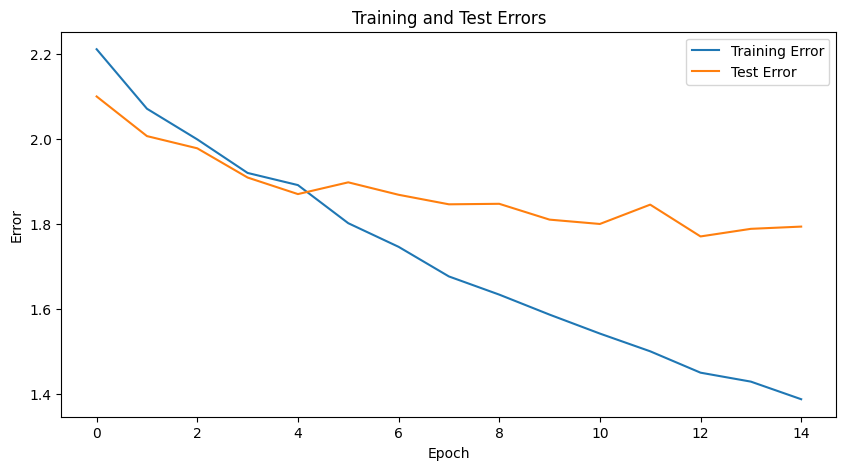


Training with RMSProp and Dropout Rate: 0.5
Epoch [1/15], Train Loss: 2.2876, Test Loss: 2.2338, Accuracy: 19.00%
Epoch [2/15], Train Loss: 2.2070, Test Loss: 2.1100, Accuracy: 21.00%
Epoch [3/15], Train Loss: 2.1002, Test Loss: 1.9885, Accuracy: 29.00%
Epoch [4/15], Train Loss: 2.0224, Test Loss: 1.8804, Accuracy: 35.00%
Epoch [5/15], Train Loss: 1.9326, Test Loss: 1.8501, Accuracy: 36.00%
Epoch [6/15], Train Loss: 1.8695, Test Loss: 1.7580, Accuracy: 39.00%
Epoch [7/15], Train Loss: 1.8385, Test Loss: 1.7455, Accuracy: 40.00%
Epoch [8/15], Train Loss: 1.7415, Test Loss: 1.7407, Accuracy: 45.00%
Epoch [9/15], Train Loss: 1.7178, Test Loss: 1.7384, Accuracy: 40.00%
Epoch [10/15], Train Loss: 1.6880, Test Loss: 1.7039, Accuracy: 35.00%
Epoch [11/15], Train Loss: 1.6509, Test Loss: 1.6602, Accuracy: 42.00%
Epoch [12/15], Train Loss: 1.6174, Test Loss: 1.6167, Accuracy: 46.00%
Epoch [13/15], Train Loss: 1.5710, Test Loss: 1.7217, Accuracy: 37.00%
Epoch [14/15], Train Loss: 1.5461, Test L

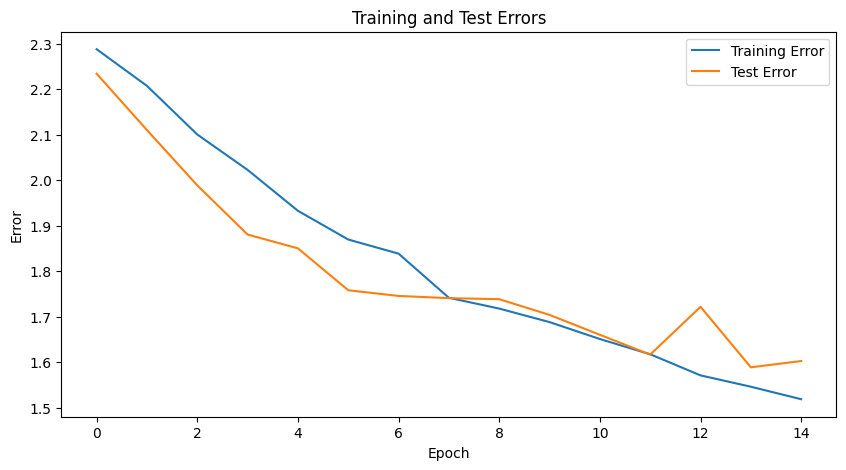


Training with RMSProp and Dropout Rate: 0.8
Epoch [1/15], Train Loss: 2.2984, Test Loss: 2.2644, Accuracy: 19.00%
Epoch [2/15], Train Loss: 2.2599, Test Loss: 2.1675, Accuracy: 29.00%
Epoch [3/15], Train Loss: 2.1944, Test Loss: 2.1232, Accuracy: 31.00%
Epoch [4/15], Train Loss: 2.1693, Test Loss: 2.0841, Accuracy: 32.00%
Epoch [5/15], Train Loss: 2.1200, Test Loss: 2.0536, Accuracy: 33.00%
Epoch [6/15], Train Loss: 2.1052, Test Loss: 2.0558, Accuracy: 33.00%
Epoch [7/15], Train Loss: 2.0698, Test Loss: 1.9996, Accuracy: 30.00%
Epoch [8/15], Train Loss: 2.0408, Test Loss: 1.9646, Accuracy: 33.00%
Epoch [9/15], Train Loss: 2.0329, Test Loss: 1.9661, Accuracy: 33.00%
Epoch [10/15], Train Loss: 2.0057, Test Loss: 1.9147, Accuracy: 37.00%
Epoch [11/15], Train Loss: 2.0114, Test Loss: 1.9347, Accuracy: 33.00%
Epoch [12/15], Train Loss: 1.9759, Test Loss: 1.8863, Accuracy: 39.00%
Epoch [13/15], Train Loss: 1.9681, Test Loss: 1.8742, Accuracy: 35.00%
Epoch [14/15], Train Loss: 1.9276, Test L

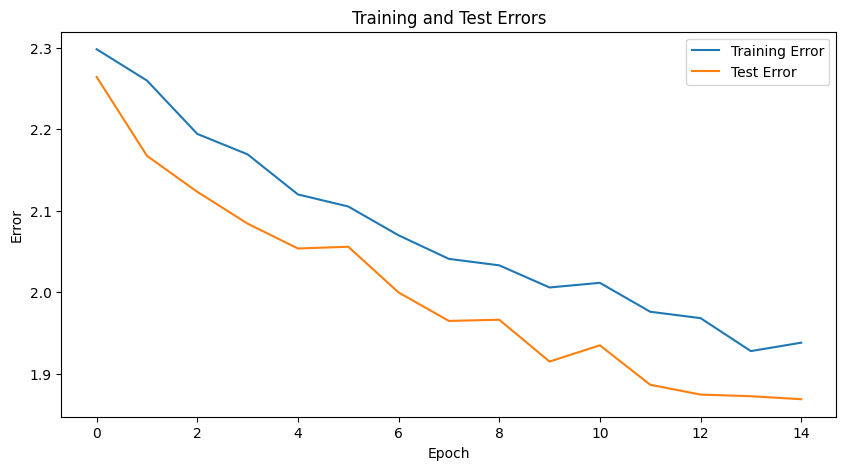

In [ ]:
def train_with_dropout(dropout_rate):
    print(f"\nTraining with RMSProp and Dropout Rate: {dropout_rate}")
    model = CNNModel(dropout_rate=dropout_rate)
    optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
    train_errors, test_errors, accuracy = trainModel(model, optimizer_rmsprop, criterion)
    plot_errors(train_errors, test_errors)
    return train_errors, test_errors, accuracy

print("Training without Dropout (Baseline)")
model = CNNModel(dropout_rate=0.0)
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
train_errors_baseline, test_errors_baseline, accuracy_baseline = trainModel(model, optimizer_rmsprop, criterion)
plot_errors(train_errors_baseline, test_errors_baseline)

dropout_rates = [0.2, 0.5, 0.8]
results = {}
for rate in dropout_rates:
    train_errors, test_errors, accuracy = train_with_dropout(rate)
    results[rate] = {'train_errors': train_errors, 'test_errors': test_errors, 'accuracy': accuracy}


1. Higher dropout may reduce overfitting but can also make it harder for the model to learn in smaller datasets.

2. There is a slight increase in accuracy when the dropout is low(0.2) as compared to the baseline without dropout but it decreases with increase in dropout rate.

In [ ]:
class CNNModel2(nn.Module):
    def __init__(self, dropout_rate=0.2):
        super(CNNModel2, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=5, stride=1, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(4, 4, kernel_size=5, stride=1, padding=2)

        self.fc1 = nn.Linear(4 * 8 * 8, 49)
        self.bn1 = nn.BatchNorm1d(49)          
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(49, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 4 * 8 * 8)

        x = self.bn1(self.fc1(x))
        x = torch.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x



Training with RMSProp, Batch Normalization, and Dropout Rate: 0.2
Epoch [1/15], Train Loss: 2.1437, Test Loss: 1.9822, Accuracy: 29.00%
Epoch [2/15], Train Loss: 1.8825, Test Loss: 1.7795, Accuracy: 42.00%
Epoch [3/15], Train Loss: 1.7676, Test Loss: 1.7313, Accuracy: 37.00%
Epoch [4/15], Train Loss: 1.6514, Test Loss: 1.6979, Accuracy: 38.00%
Epoch [5/15], Train Loss: 1.5574, Test Loss: 1.6658, Accuracy: 45.00%
Epoch [6/15], Train Loss: 1.4991, Test Loss: 1.7220, Accuracy: 36.00%
Epoch [7/15], Train Loss: 1.4445, Test Loss: 1.7684, Accuracy: 34.00%
Epoch [8/15], Train Loss: 1.3569, Test Loss: 1.7510, Accuracy: 33.00%
Epoch [9/15], Train Loss: 1.3128, Test Loss: 1.8486, Accuracy: 36.00%
Epoch [10/15], Train Loss: 1.2175, Test Loss: 1.8227, Accuracy: 39.00%
Epoch [11/15], Train Loss: 1.1632, Test Loss: 1.8339, Accuracy: 36.00%
Epoch [12/15], Train Loss: 1.1097, Test Loss: 1.8164, Accuracy: 35.00%
Epoch [13/15], Train Loss: 1.0496, Test Loss: 1.8322, Accuracy: 38.00%
Epoch [14/15], Trai

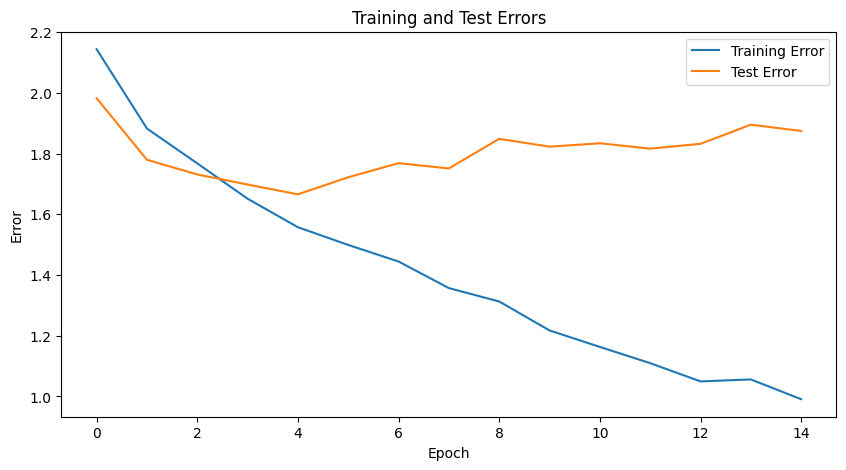

In [31]:
print("\nTraining with RMSProp, Batch Normalization, and Dropout Rate: 0.2")
model = CNNModel2(dropout_rate=0.2)
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001, alpha=0.9)
train_errors_bn_dropout, test_errors_bn_dropout, accuracy_bn_dropout = trainModel(model, optimizer_rmsprop, criterion)
plot_errors(train_errors_bn_dropout, test_errors_bn_dropout)


1. Training Errors: Batch normalization can reduces internal covariate shift, leading to faster convergence, so we see faster error reduction in early epochs.

2. Test Errors: Dropout typically improves generalization, so combined with batch normalization, hence we observe better test performance over dropout-only models.

3. Accuracy: Adding BN and dropout increases accuracy on the test set as it helps in stabilizing and regularizing training.